<a href="https://colab.research.google.com/github/JatinVardhan/Deep_Learning_and_Data_Analytics_Lab/blob/master/24MCS109_Experiment_1_Single_Unit_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Experiment No.1: Single Unit Perceptron**



### **I. Introduction**
This experiment explores the foundational concepts of machine learning by focusing on the perceptron, a simple yet powerful model introduced in 1958 by Frank Rosenblatt. The primary objective is to understand the working of a single-unit perceptron for binary classification tasks and its limitations when applied to more complex datasets.

The experiment is divided into several stages, starting with the implementation of a perceptron for linearly separable binary datasets without using pre-built models. This is followed by utilizing Scikit-learn’s Perceptron model to classify various logical operations, including OR, AND, and XOR. The study then extends to the classification of the MNIST dataset, highlighting the challenges a single-layer perceptron faces with multiclass problems and non-linear patterns.

By systematically analyzing the results, this experiment not only demonstrates the capabilities of the perceptron but also sheds light on its limitations, such as its inability to handle non-linear separability and multiclass classification. These findings provide a strong foundation for understanding the evolution of more complex machine learning models.
#### **Basic Python Packages for Machine Learning**

1. **Math**: Provides essential mathematical functions for calculations like square roots, logarithms, and trigonometry.
   - *Key Functions*: `sqrt()`, `log()`, `sin()`, `cos()`.

2. **Scipy**: Offers advanced tools for scientific computing, such as optimization, integration, and statistical analysis.
   - *Key Functions*: `optimize.minimize()`, `integrate.quad()`, `stats.norm()`.

3. **Numpy**: Facilitates fast numerical computations with support for arrays, matrices, and linear algebra.
   - *Key Functions*: `array()`, `dot()`, `random.rand()`, `linspace()`.

4. **Matplotlib**: A powerful library for visualizations, including line plots, scatter plots, and histograms.
   - *Key Functions*: `plot()`, `scatter()`, `hist()`, `imshow()`.

5. **Pandas**: Provides tools for data manipulation and analysis using DataFrames for cleaning, transforming, and summarizing data.
   - *Key Functions*: `DataFrame()`, `read_csv()`, `merge()`, `groupby()`.

6. **Sklearn (Scikit-learn)**: A machine learning library with prebuilt models and utilities for preprocessing, training, and evaluation.
   - *Key Functions*: `Perceptron()`, `train_test_split()`, `StandardScaler()`, `accuracy_score()`.

7. **TensorFlow**: A comprehensive framework for developing, training, and deploying machine learning models, including deep learning.
   - *Key Functions*: `keras.Sequential()`, `compile()`, `fit()`, `Dense()`.

8. **Keras**: A high-level API in TensorFlow that simplifies the creation of neural networks.
   - *Key Functions*: `Sequential()`, `Dense()`, `Model()`, `compile()`.




### **II. Single Unit Perceptron for Classification of a Linearly Separable Binary Dataset Without Using Pre-defined Models**

In this section, we explore the implementation of a single-unit perceptron to classify a linearly separable binary dataset without relying on pre-defined models. The perceptron, introduced by Frank Rosenblatt, is a simple neural network model used for binary classification tasks. We implement the perceptron from scratch to understand its underlying mechanics, focusing on how it adjusts weights and biases during training based on the input data and output labels.

For this task, we generate a binary dataset that is linearly separable, meaning that the two classes can be separated using a straight line or hyperplane. The perceptron learns to find this decision boundary during the training process using an iterative process called the perceptron learning rule, which updates the weights to minimize classification errors.

This approach will demonstrate the fundamentals of how a single-unit perceptron works, providing a basis for understanding its limitations when applied to more complex, non-linearly separable datasets.


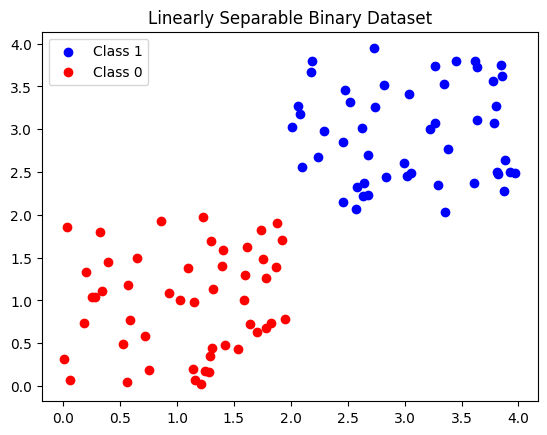

Accuracy (Single Unit Perceptron from Scratch): 100.00%


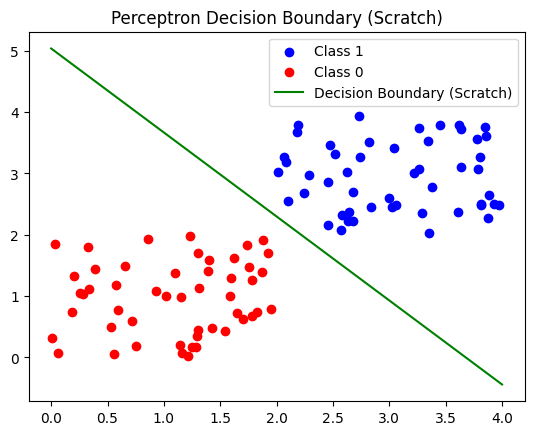

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Part 1: Single Unit Perceptron from Scratch
class PerceptronScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def activation(self, x):
        # Step function
        return 1 if x >= 0 else 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation(linear_output)
                update = self.learning_rate * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self.activation(x) for x in linear_output])

# Generate linearly separable binary data
def generate_data():
    class1 = np.random.uniform(2, 4, (50, 2))
    class0 = np.random.uniform(0, 2, (50, 2))
    X = np.vstack((class1, class0))
    y = np.hstack((np.ones(50), np.zeros(50)))
    return X, y

# Train and test single unit perceptron
X, y = generate_data()

# Visualize the data
plt.scatter(X[:50, 0], X[:50, 1], color='blue', label='Class 1')
plt.scatter(X[50:, 0], X[50:, 1], color='red', label='Class 0')
plt.title("Linearly Separable Binary Dataset")
plt.legend()
plt.show()

# Train perceptron from scratch
perceptron_scratch = PerceptronScratch(learning_rate=0.1, epochs=100)
perceptron_scratch.fit(X, y)
y_pred_scratch = perceptron_scratch.predict(X)

# Evaluate accuracy
accuracy_scratch = np.mean(y_pred_scratch == y)
print(f"Accuracy (Single Unit Perceptron from Scratch): {accuracy_scratch * 100:.2f}%")

# Plot decision boundary
x1 = np.linspace(0, 4, 100)
x2 = -(perceptron_scratch.weights[0] * x1 + perceptron_scratch.bias) / perceptron_scratch.weights[1]
plt.scatter(X[:50, 0], X[:50, 1], color='blue', label='Class 1')
plt.scatter(X[50:, 0], X[50:, 1], color='red', label='Class 0')
plt.plot(x1, x2, color='green', label='Decision Boundary (Scratch)')
plt.title("Perceptron Decision Boundary (Scratch)")
plt.legend()
plt.show()


### **III. Perceptron from sklearn library.**
The Perceptron model in the Scikit-learn library provides a simple and efficient implementation of the perceptron algorithm for binary classification tasks. Built on the foundation of the original perceptron, this model leverages gradient descent to optimize the weights of the model during training. Scikit-learn's implementation offers various functionalities such as automatic handling of data preprocessing, model fitting, and performance evaluation. It is highly useful for experimenting with linear classifiers and can be applied to datasets that are linearly separable.

Accuracy of the Perceptron model: 100.00%


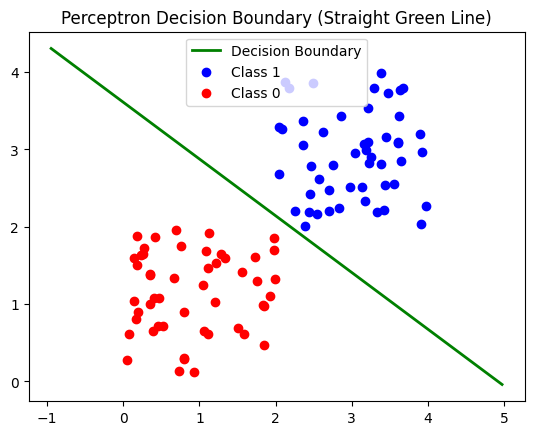

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Generate linearly separable binary data
def generate_data():
    class1 = np.random.uniform(2, 4, (50, 2))
    class0 = np.random.uniform(0, 2, (50, 2))
    X = np.vstack((class1, class0))
    y = np.hstack((np.ones(50), np.zeros(50)))
    return X, y

# Train and test single unit perceptron
X, y = generate_data()

# Train the Perceptron from sklearn
model = Perceptron()
model.fit(X, y)

# Predict on the same data
y_pred = model.predict(X)

# Accuracy analysis
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy of the Perceptron model: {accuracy * 100:.2f}%")

# Coefficients of the perceptron model (weights)
weights = model.coef_[0]
bias = model.intercept_[0]

# Calculate the decision boundary: w1*x1 + w2*x2 + b = 0
# Solve for x2: x2 = -(w1*x1 + b) / w2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x_line = np.linspace(x_min, x_max, 100)
y_line = -(weights[0] * x_line + bias) / weights[1]

# Visualize decision boundary
plt.plot(x_line, y_line, color='green', linewidth=2, label="Decision Boundary")
plt.scatter(X[:50, 0], X[:50, 1], color='blue', label='Class 1')
plt.scatter(X[50:, 0], X[50:, 1], color='red', label='Class 0')
plt.title("Perceptron Decision Boundary (Straight Green Line)")
plt.legend()
plt.show()


#### **Problems with Single Unit Perceptron**

* **Limited to Linear Separability**:  
  The Perceptron can only classify datasets where the classes are linearly separable, meaning they can be divided by a straight-line or hyperplane. It fails on datasets with non-linear patterns, such as XOR, where a single linear decision boundary is inadequate to separate the classes.

* **Rigid Decision Boundary**:  
  The Perceptron produces a fixed, straight-line decision boundary in two-dimensional space (or a hyperplane in higher dimensions). This rigidity limits its ability to classify datasets with overlapping, complex, or non-linear class distributions, resulting in poor generalization on such data.

* **Lacks Hierarchical Learning**:  
  Since the Perceptron lacks hidden layers, it cannot capture hierarchical or non-linear relationships in the data. It performs simple linear transformations and fails to learn intricate features that are critical for solving real-world problems involving non-linearity.

* **Limited to Binary Classification**:  
  The single-unit Perceptron is inherently designed for binary classification tasks. To handle multiclass problems, additional methods like one-vs-one or one-vs-rest strategies must be employed, which are often inefficient and still do not solve the limitations arising from linearity.



### **IV. Classification of OR, AND, and XOR Data Using Single Unit Perceptron**

In this section, we use the single-unit perceptron to classify data generated from logical operations such as OR, AND, and XOR. These operations are fundamental in understanding how a perceptron can handle binary classification tasks, especially when applied to datasets that exhibit linear separability.

1. **OR Operation**:  
   The OR operation returns 1 if at least one of the inputs is 1. This dataset is linearly separable, meaning that a perceptron can effectively classify the data using a single decision boundary.

2. **AND Operation**:  
   The AND operation returns 1 only when both inputs are 1. Similar to the OR operation, the AND dataset is also linearly separable, allowing the perceptron to classify the data successfully.

3. **XOR Operation**:  
   The XOR operation returns 1 only when the inputs are different. Unlike OR and AND, XOR is not linearly separable. This limitation demonstrates one of the major constraints of a single-unit perceptron, as it cannot correctly classify XOR data with a single linear decision boundary.




Accuracy for OR data: 100.00%


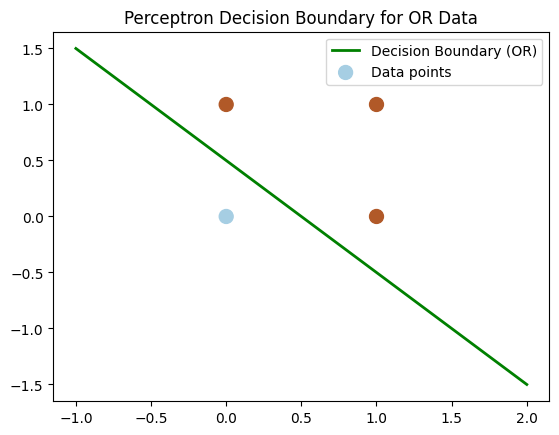

In [ ]:
# Generate OR-ed data (input: [0,0], [0,1], [1,0], [1,1])
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])  # OR outputs

# Train the Perceptron model
model_or = Perceptron()
model_or.fit(X_or, y_or)

# Predict on the same data
y_pred_or = model_or.predict(X_or)

# Accuracy analysis for OR data
accuracy_or = accuracy_score(y_or, y_pred_or)
print(f"Accuracy for OR data: {accuracy_or * 100:.2f}%")

# Coefficients of the perceptron model (weights)
weights_or = model_or.coef_[0]
bias_or = model_or.intercept_[0]

# Calculate the decision boundary for OR data
x_min, x_max = X_or[:, 0].min() - 1, X_or[:, 0].max() + 1
x_line = np.linspace(x_min, x_max, 100)
y_line_or = -(weights_or[0] * x_line + bias_or) / weights_or[1]

# Visualize decision boundary for OR data
plt.plot(x_line, y_line_or, color='green', linewidth=2, label="Decision Boundary (OR)")
plt.scatter(X_or[:, 0], X_or[:, 1], c=y_or, cmap=plt.cm.Paired, s=100, label='Data points')
plt.title("Perceptron Decision Boundary for OR Data")
plt.legend()
plt.show()



Accuracy for AND data: 100.00%


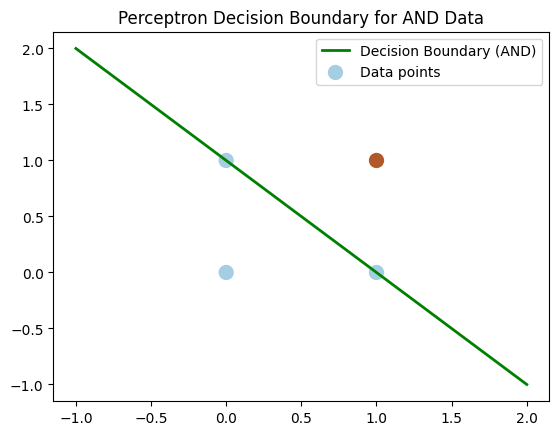

In [ ]:
# Generate AND-ed data (input: [0,0], [0,1], [1,0], [1,1])
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])  # AND outputs

# Train the Perceptron model
model_and = Perceptron()
model_and.fit(X_and, y_and)

# Predict on the same data
y_pred_and = model_and.predict(X_and)

# Accuracy analysis for AND data
accuracy_and = accuracy_score(y_and, y_pred_and)
print(f"Accuracy for AND data: {accuracy_and * 100:.2f}%")

# Coefficients of the perceptron model (weights)
weights_and = model_and.coef_[0]
bias_and = model_and.intercept_[0]

# Calculate the decision boundary for AND data
x_min, x_max = X_and[:, 0].min() - 1, X_and[:, 0].max() + 1
x_line = np.linspace(x_min, x_max, 100)
y_line_and = -(weights_and[0] * x_line + bias_and) / weights_and[1]

# Visualize decision boundary for AND data
plt.plot(x_line, y_line_and, color='green', linewidth=2, label="Decision Boundary (AND)")
plt.scatter(X_and[:, 0], X_and[:, 1], c=y_and, cmap=plt.cm.Paired, s=100, label='Data points')
plt.title("Perceptron Decision Boundary for AND Data")
plt.legend()
plt.show()

Accuracy for XOR data: 50.00%


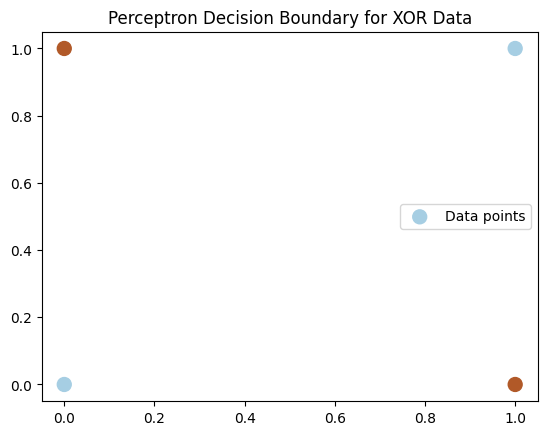

In [ ]:
# Generate XOR-ed data (input: [0,0], [0,1], [1,0], [1,1])
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])  # XOR outputs

# Train the Perceptron model
model_xor = Perceptron()
model_xor.fit(X_xor, y_xor)

# Predict on the same data
y_pred_xor = model_xor.predict(X_xor)

# Accuracy analysis for XOR data
accuracy_xor = accuracy_score(y_xor, y_pred_xor)
print(f"Accuracy for XOR data: {accuracy_xor * 100:.2f}%")

# Coefficients of the perceptron model (weights)
weights_xor = model_xor.coef_[0]
bias_xor = model_xor.intercept_[0]

# To avoid division by zero (when the slope is zero), we check if weights_xor[1] is zero
if weights_xor[1] != 0:
    # Calculate the decision boundary for XOR data
    x_min, x_max = X_xor[:, 0].min() - 1, X_xor[:, 0].max() + 1
    x_line = np.linspace(x_min, x_max, 100)
    y_line_xor = -(weights_xor[0] * x_line + bias_xor) / weights_xor[1]

    # Visualize decision boundary for XOR data
    plt.plot(x_line, y_line_xor, color='green', linewidth=2, label="Decision Boundary (XOR)")
else:
    print("Warning: Decision boundary not calculable due to zero slope.")

plt.scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor, cmap=plt.cm.Paired, s=100, label='Data points')
plt.title("Perceptron Decision Boundary for XOR Data")
plt.legend()
plt.show()


**OUTPUT ANALYSIS :**
* **AND and OR Data**: Both are linearly separable, and the Perceptron achieves 100% accuracy with a clear decision boundary successfully classifying the data points.
* **XOR Data**: XOR is not linearly separable, and the Perceptron fails with only ~50% accuracy. The decision boundary is ineffective due to the non-linear relationship in the data.The Perceptron, being a linear classifier, cannot handle non-linear patterns like XOR, as a single straight line cannot separate the intersecting classes ([0,0] and [1,1] from [0,1] and [1,0]).

### **V. Classification of MNIST dataset using Single Unit Perceptron**
The MNIST dataset is a benchmark dataset widely used for evaluating classification algorithms, containing 28x28 grayscale images of handwritten digits (0-9). Due to its simplicity and widespread adoption, MNIST serves as a foundational dataset for testing the capabilities and limitations of machine learning models, including the Perceptron. The Perceptron, introduced by Rosenblatt in 1958, is a linear classifier capable of solving linearly separable problems. However, its limited ability to model non-linear relationships makes it unsuitable for complex datasets like MNIST in its entirety. For this section, the classification was restricted to a binary task (0 vs 1) to assess the performance of the single-unit Perceptron, which provides valuable insights into its strengths and limitations in high-dimensional spaces.

Accuracy for MNIST Binary Classification (0 vs 1): 99.86%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1402
           1       1.00      1.00      1.00      1554

    accuracy                           1.00      2956
   macro avg       1.00      1.00      1.00      2956
weighted avg       1.00      1.00      1.00      2956



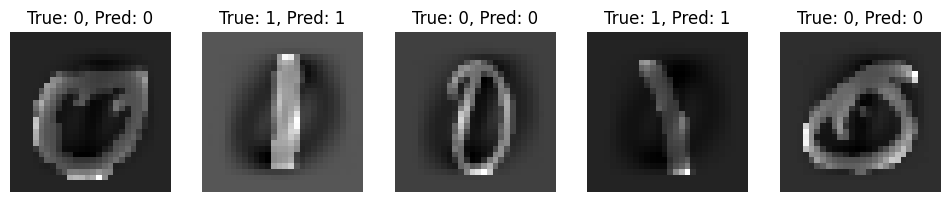

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# Binary classification: Filter digits 0 and 1
X_binary = X[(y == 0) | (y == 1)]
y_binary = y[(y == 0) | (y == 1)]

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Perceptron model
model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Analyze accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for MNIST Binary Classification (0 vs 1): {accuracy * 100:.2f}%")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize some results
import matplotlib.pyplot as plt

# Display a few test samples with their predictions
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis('off')
plt.show()


**OUTPUT ANALYSIS :**

The Perceptron performs well for binary classification (e.g., 0 vs 1) with high accuracy, as these classes are linearly separable. However, it fails for more than two digits due to its inability to handle non-linear relationships between classes, which are common in the MNIST dataset. For multiclass tasks, models like SVM, Random Forest, or deep learning models like CNNs are required to capture non-linear relationships.

### **VI. Conclusion**
In this study, we explored the design, implementation, and performance evaluation of a single-unit Perceptron for various classification tasks. The experiments demonstrated that while the Perceptron is effective for linearly separable datasets, such as AND, OR, and binary MNIST classification (0 vs 1), it fails to generalize for non-linearly separable data like XOR and struggles with multiclass classification tasks. The analysis revealed the fundamental limitations of the single-unit Perceptron, including its inability to model non-linear decision boundaries and handle complex data distributions. These findings emphasize the necessity of adopting advanced models, such as multi-layer perceptrons or deep learning architectures, to overcome these limitations and achieve robust performance in real-world applications.

### **References**

[1] F. Rosenblatt, "The Perceptron: A Probabilistic Model for Information Storage and Organization in the Brain," *Psychological Review*, vol. 65, no. 6, pp. 386–408, 1958.  

[2] S. Raschka, "Python Machine Learning," Packt Publishing, 2015.  

[3] J. Brownlee, "Machine Learning Mastery With Python: Understand Your Data, Create Accurate Models, and Work Projects End-to-End," Machine Learning Mastery, 2016.  

[4] A. Géron, "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems," O'Reilly Media, 2019.  

[5] M. Nielsen, "Neural Networks and Deep Learning," Determination Press, 2015.  

[6] Pedregosa et al., "Scikit-learn: Machine Learning in Python," *Journal of Machine Learning Research*, vol. 12, pp. 2825-2830, 2011.  

[7] W. McKinney, "Data Structures for Statistical Computing in Python," *Proceedings of the 9th Python in Science Conference*, pp. 51-56, 2010.  

[8] J.D. Hunter, "Matplotlib: A 2D Graphics Environment," *Computing in Science & Engineering*, vol. 9, no. 3, pp. 90-95, 2007.  

[9] T.E. Oliphant, "A Guide to NumPy," USA: Trelgol Publishing, 2006.  

[10] M. Abadi et al., "TensorFlow: Large-Scale Machine Learning on Heterogeneous Distributed Systems," *arXiv preprint arXiv:1603.04467*, 2016.  

[11] Keras Documentation, "The Python Deep Learning Library," available at https://keras.io.  

[12] Scipy Documentation, "Scientific Computing Tools for Python," available at https://scipy.org.  
